In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/work/Anexo Parte 1 - glassdoordata.csv')

## Análisis exploratorio

In [ ]:
df.head()

,jobtitle,gender,age,performance,education,department,seniority,income,bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


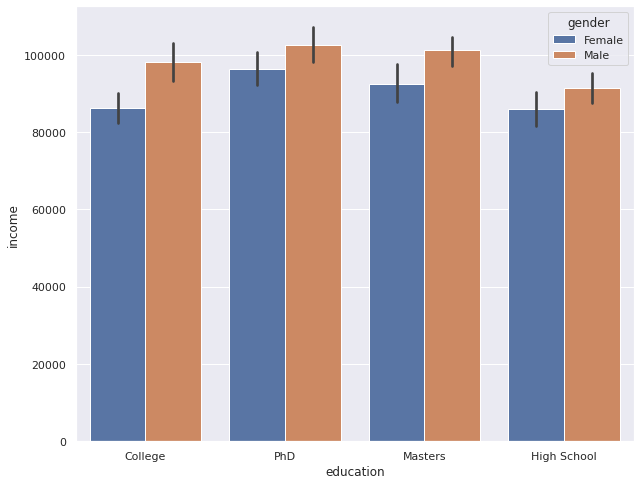

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(
    data=df,
    y=df['income'],
    x=df['education'],
    hue=df['gender']

)

plt.show()

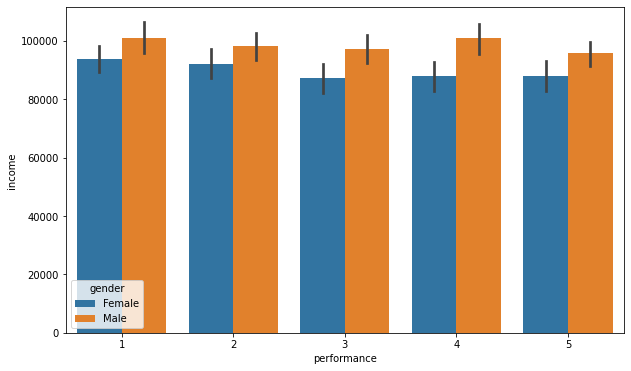

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=df,
    y=df['income'],
    x=df['performance'],
    hue=df['gender']

)

plt.show()

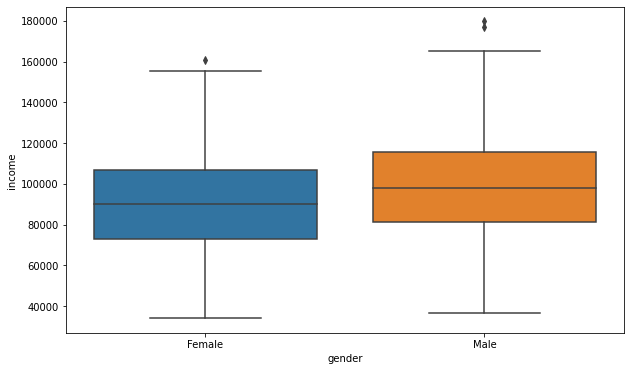

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    y=df['income'],
    x=df['gender']
)

plt.show()

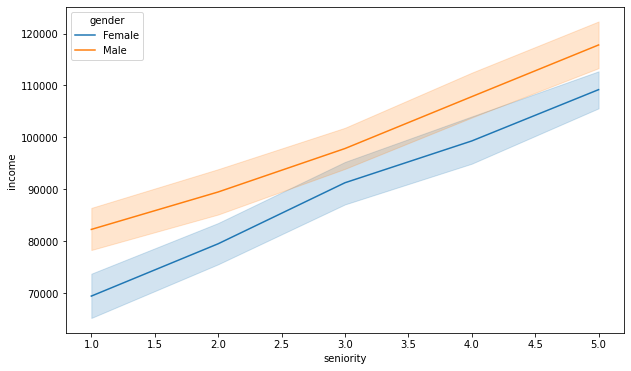

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=df,
    y=df['income'],
    x=df['seniority'],
    hue=df['gender']
)

plt.show()

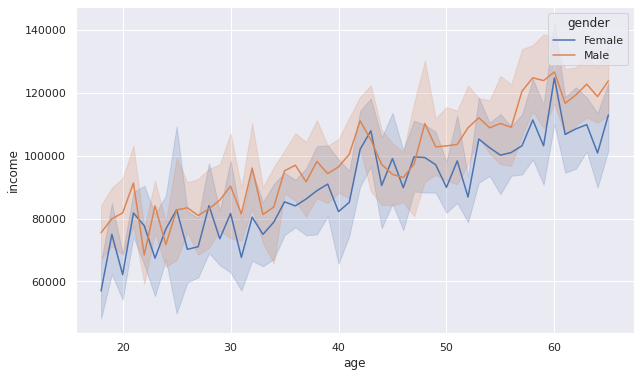

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=df,
    y=df['income'],
    x=df['age'],
    hue=df['gender']
)

plt.show()

## Calculo de Medidas

In [ ]:
Cantidad_Profesion = df.groupby(df['jobtitle']).size().reset_index(name='Cantidad_Profesionales')

In [ ]:
## Top 10 del pago total por cargo.

verificacion = df['income'].nlargest(n=10)
Top_10_Salarios = df.loc[df['income'] >= 157277,['jobtitle','gender','income']]
Top_10_Salarios.head(10)

,jobtitle,gender,income
233,Manager,Male,157410
350,Software Engineer,Male,157852
353,Manager,Male,176789
357,Manager,Female,160614
528,Manager,Male,157644
609,IT,Male,165229
737,Software Engineer,Male,157277
799,Manager,Male,163208
869,Software Engineer,Male,160460
927,Manager,Male,179726


In [ ]:
## Niveles Educativos mejor pagos

Profesion_Paga = df.groupby(['education'])['income'].max().reset_index(name = 'Profesion Mejor Pagada')
Profesion_Paga.sort_values('Profesion Mejor Pagada', inplace=True)
Profesion_Paga

,education,Profesion Mejor Pagada
0,College,160460
1,High School,163208
2,Masters,165229
3,PhD,179726


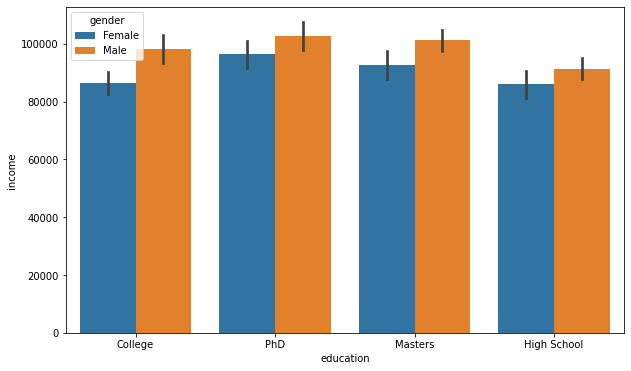

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=Profesion_Paga,
    y=df['Profesion Mejor Pagada'],
    x=df['education'],
    hue=df['gender']
)
plt.show()

In [ ]:
## Mediana Hombres y Mujeres

Mediana_Pagos = df.groupby(['gender'])['income'].median()
Mediana_Pagos.reset_index(name = 'Mediana Genero')

,gender,Mediana Genero
0,Female,89913.5
1,Male,98223.0


In [ ]:
## Media y Desviacion estandar del rendimiento por cargo.

Media_Rendimiento_Cargo = df.groupby(['jobtitle'])['performance'].mean().reset_index(name = 'Media de Rendimiento')
DesviacionStd_Rendimiento_Cargo = df.groupby(['jobtitle'])['performance'].std().reset_index(name = 'Desviacion Estandar')
MSCargo = pd.merge(Media_Rendimiento_Cargo,DesviacionStd_Rendimiento_Cargo, on='jobtitle')
MSCargo

,jobtitle,Media de Rendimiento,Desviacion Estandar
0,Data Scientist,2.971963,1.423906
1,Driver,3.065934,1.340002
2,Financial Analyst,3.271028,1.418011
3,Graphic Designer,3.122449,1.466220
4,IT,3.125000,1.481464
5,Manager,2.700000,1.302116
6,Marketing Associate,2.923729,1.409108
7,Sales Associate,2.797872,1.387965
8,Software Engineer,3.128440,1.515970
9,Warehouse Associate,3.244444,1.416683


In [ ]:
## Departamento con personal de mayor antiguedad

Mayor_Antiguedad = df.groupby(['department'])['seniority'].mean().reset_index(name = 'Antigüedad')
Mayor_Antiguedad

,department,Antigüedad
0,Administration,3.103627
1,Engineering,3.140625
2,Management,2.974747
3,Operations,2.780952
4,Sales,2.879227


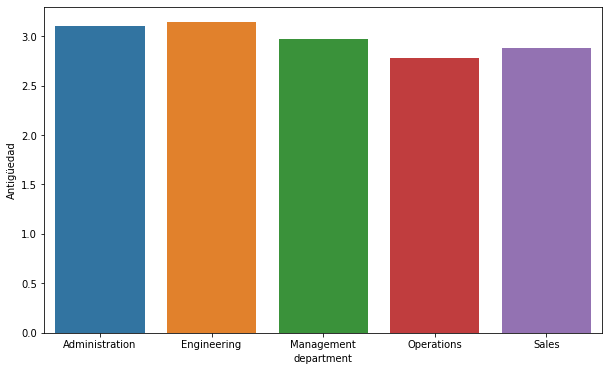

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=Mayor_Antiguedad,
    x='department',
    y='Antigüedad'
)
plt.show()

## Pagos totales de cada genero

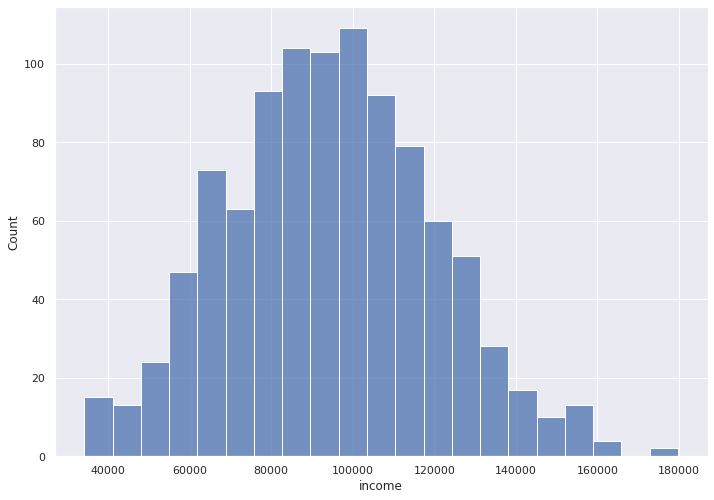

In [ ]:
""" 
Comprobamos si la Data es simetrica,  y lo es debido a que forma una campana de Gaus
con esto en mente se puede normalizar
"""
sns.histplot(
    data=df,
    x='income'
)
plt.show()

In [ ]:
# Desviación estandar
df['income'].std()

# Rango = valor max - valor min
rango = df['income'].max() - df['income'].min()
rango

# Quartiles
median = df['income'].median()
Q1 = df['income'].quantile(q=0.25)
Q3 = df['income'].quantile(q=0.75)
min_val = df['income'].quantile(q=0)
max_val = df['income'].quantile(q=1.0)
print(min_val, Q1, median, Q3, max_val)

34208.0 76850.25 93327.5 111558.0 179726.0


In [ ]:
iqr = Q3 - Q1
iqr

34707.75

### Límites para detección de outliers (datos simetricamente distribuidos)

In [ ]:
minlimit = Q1 - 1.5*iqr
maxlimit = Q3 + 1.5*iqr
print('rango para detección de outliers: {}, {}'.format(minlimit, maxlimit))

rango para detección de outliers: 24788.625, 163619.625


/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, '')]

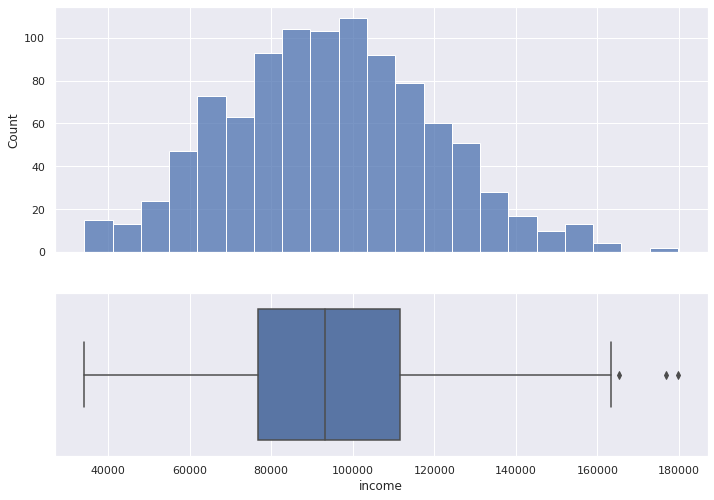

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.6, .4)})
sns.histplot(df['income'], ax=ax_hist)
sns.boxplot(df['income'], ax=ax_box)
ax_hist.set(xlabel='')

## Correlaciones

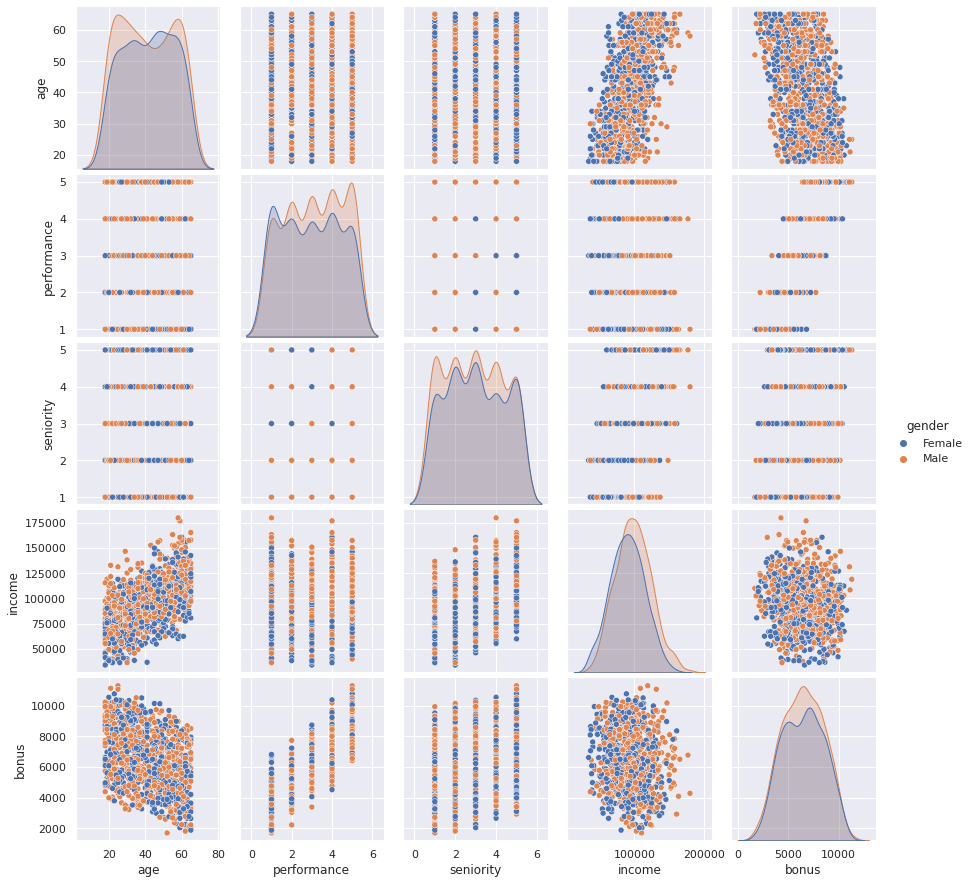

In [ ]:
sns.pairplot(
    data = df,
    hue='gender'
)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ff2c00f2-e65d-4b06-9e2c-17e6644f2756' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>